In [8]:
import pandas as pd
import numpy as np
import os
from datetime import date

##sources of file 
dfnpath = 'pages/Temp/Excel/15101160_20220519_0443.xlsx'
dfopath = 'pages/Temp/Record/Data.csv'
catnpath = 'pages/Temp/Excel/DiscriptionCategories.xlsx'
catopath = 'pages/Temp/Record/DiscriptionCategories.xlsx'

df = pd.read_csv(dfnpath,encoding='latin1',index_col=[0])
df = df.dropna(axis=1,how='all')
catn = pd.read_excel(catnpath)
cato = pd.read_excel(catopath)
dfo = pd.read_csv(dfopath,encoding='latin1',index_col=[0])
dfo = dfo.dropna(axis=1,how='all')

## delete columns from the table 
df = df.drop(columns=['Account Number','Balance','Transaction Type','Sort Code'])
catn = catn.drop(columns=['Transaction Date','Debit Amount','Credit Amount'])

# combine new and old cat table
cat = pd.concat([catn,cato], ignore_index=True)
df = pd.concat([df,dfo], ignore_index=True)

## change data type into string 
df['Transaction Description'] = df['Transaction Description'].astype(str)

UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 15-16: invalid continuation byte

In [ ]:
## merge cat table with df 
MergeTable = pd.merge(df,
                        cat,
                        on = 'Transaction Description',
                        how = 'left',
                        suffixes = ('','_DROP')).filter(regex='^(?!.*_DROP)')

MergeTable = MergeTable.drop_duplicates(ignore_index=True)

##identifly Nan cat and save

catn = MergeTable[MergeTable['Categories'].isna()]
catn = catn.drop_duplicates(ignore_index=True)
catn = catn.loc[:, ~catn.columns.str.contains('^Unnamed')]
catn.to_excel(catnpath,index=False)

,Transaction Date,Transaction Description,Debit Amount,Credit Amount,Categories
0,25/04/2022,COMMON ROOM,14.50,NaN,NaN
1,25/04/2022,J D WETHERSPOON PL,6.45,NaN,NaN
2,25/04/2022,RCPMOTO,1543.26,NaN,NaN
3,26/04/2022,NTSU - CITY COSTA,4.50,NaN,NaN
4,26/04/2022,TESCO STORE 2960,3.35,NaN,NaN


<AxesSubplot:title={'center':'Total Expenses'}, ylabel='Debit Amount'>

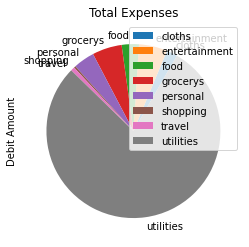

In [ ]:

cato = cat[cat['Categories'].notna()]
cato = cato.drop_duplicates(ignore_index=True)
cato = cato.loc[:, ~cato.columns.str.contains('^Unnamed')]
cato.to_excel(catopath,index=False)

In [ ]:
##store the new Categories to excel file 
MergeTable = MergeTable.loc[:, ~MergeTable.columns.str.contains('^Unnamed')]
MergeTable.to_csv(dfopath, index=False)

# move and rename dfn to backup file 

backup_path = 'AccountApp/Streamlit/pages/Temp/Record/Backup/'+str(date.today())+'.csv'
os.rename(dfnpath,backup_path)

2022-08-12 14:07:15.014 
  command:

    streamlit run /Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/ipykernel_launcher.py [ARGUMENTS]


AgGridReturn(data=    Transaction Date Transaction Description  Debit Amount  Credit Amount  \
0         25/04/2022             COMMON ROOM         14.50            NaN   
1         25/04/2022      J D WETHERSPOON PL          6.45            NaN   
2         25/04/2022                 RCPMOTO       1543.26            NaN   
3         26/04/2022       NTSU - CITY COSTA          4.50            NaN   
4         26/04/2022        TESCO STORE 2960          3.35            NaN   
..               ...                     ...           ...            ...   
222              NaN                 PRIMARK          9.00            NaN   
223              NaN       TESCO STORES 5954          0.80            NaN   
224              NaN          PAYPAL PAYMENT          5.00            NaN   
225              NaN          PAYPAL PAYMENT          1.00            NaN   
226              NaN                     nan           NaN            NaN   

    Categories  
0          NaN  
1          NaN  
2     

2022-09-30 23:48:42.476 
  command:

    streamlit run /Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/ipykernel_launcher.py [ARGUMENTS]


AttributeError: 'DataFrameGroupBy' object has no attribute 'reset_index'